In [114]:
import pandas as pd
telco_df=pd.read_csv('Telcom_Customer.csv')
telco_df.shape
telco_df['TotalCharges'].dtype

dtype('O')

In [115]:
pd.DataFrame({'column_name':telco_df.columns,
               'missing_value_count':telco_df.isnull().sum(),
               'missing_value_percentage':telco_df.isnull().sum()/telco_df.shape[0]*100})

,column_name,missing_value_count,missing_value_percentage
customerID,customerID,0,0.0
gender,gender,0,0.0
SeniorCitizen,SeniorCitizen,0,0.0
Partner,Partner,0,0.0
Dependents,Dependents,0,0.0
tenure,tenure,0,0.0
PhoneService,PhoneService,0,0.0
MultipleLines,MultipleLines,0,0.0
InternetService,InternetService,0,0.0
OnlineSecurity,OnlineSecurity,0,0.0


In [116]:
cols_to_drop=[]

for col in telco_df.columns:
    if len(telco_df[col].unique())==1 or len(telco_df[col].unique())==telco_df.shape[0]:
        cols_to_drop.append(col)
        
cols_to_drop
                        

['customerID']

In [117]:
telco_df.drop(columns=cols_to_drop,inplace=True)

In [118]:
telco_df.shape

(7043, 20)

In [119]:
num_cols=['tenure','MonthlyCharges']

cat_cols=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges']



# Checking Correlations:

In [120]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway


In [121]:
# chi2 test:
p_val_col=[]

for col in cat_cols:
    def chi2(col):
        con_table=pd.crosstab(telco_df[col],telco_df['Churn'])
        results=chi2_contingency(con_table)
        return p_val_col.append(results[1])
    chi2(col)

p_val_col

col_df=pd.DataFrame({'column_name':cat_cols,
                    'p_values':p_val_col})
col_df

corre_cols=list(col_df[col_df['p_values']<0.05]['column_name'])
corre_cols
not_corre_cols=list(col_df[col_df['p_values']>0.05]['column_name'])
not_corre_cols





['gender', 'PhoneService', 'TotalCharges']

In [122]:
telco_df.drop(columns=not_corre_cols,inplace=True)

In [123]:
telco_df.shape

(7043, 17)

In [124]:
# anova test:

p_val=[]
for col in num_cols:
    def anova(col):
        categories_list=list(telco_df['Churn'].value_counts().index)
        result=f_oneway(*(telco_df[telco_df['Churn']==category][col] for category in categories_list))
        return p_val.append(result[1])
    anova(col)
    
p_val

        

[7.999057960610892e-205, 2.7066456068950115e-60]

In [125]:
telco_df['Churn'].replace(to_replace='Yes',value=1,inplace=True)
telco_df['Churn'].replace(to_replace='No',value=0,inplace=True)
telco_df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [126]:
y=telco_df['Churn']
telco_df.drop(columns='Churn',inplace=True)

# Train_Test Split:

In [127]:
from sklearn.model_selection import train_test_split

import numpy as np

In [128]:
X_train,X_test,y_train,y_test=train_test_split(telco_df,y,test_size=0.2,random_state=42)

# Scaling:

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
minmaxscaler=MinMaxScaler()

for col in num_cols:
    X_train[col]=minmaxscaler.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col]=minmaxscaler.transform(np.array(X_test[col]).reshape(-1,1))

C:\Users\dipti\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dipti\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dipti\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

# One_Hot Encoding:

In [131]:

cat_cols=['SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

oe_train_df=pd.get_dummies(X_train[cat_cols])
oe_test_df=pd.get_dummies(X_test[cat_cols])





In [132]:
oe_test_df.shape

(1409, 38)

In [133]:
X_train_oe,X_test_oe=oe_train_df.align(oe_test_df,axis=1,join='inner',fill_value=0)

X_train_oe

,SeniorCitizen,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,1,0,0,1,1,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
1623,0,1,0,1,0,0,0,1,0,1,...,1,0,0,1,0,1,1,0,0,0
6074,0,0,1,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1362,0,1,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
6754,0,1,0,0,1,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,1,0,1,0,0,0,1,...,1,1,0,0,0,1,0,0,1,0
5191,0,0,1,0,1,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,0
5226,0,0,1,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5390,1,1,0,1,0,0,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0


In [134]:
X_train_final=pd.concat([X_train_oe,X_train[num_cols]],axis=1)
X_test_final=pd.concat([X_test_oe,X_test[num_cols]],axis=1)


In [135]:
X_test_final.shape

(1409, 40)

# Training a Logistic Regression Model:

In [136]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

import matplotlib.pyplot as plt

In [137]:
logreg=LogisticRegression()
logreg.fit(X_train_final,y_train)
predictions=logreg.predict(X_test_final)
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
roc_auc_score(y_test,y_proba)

0.8607101452275715

Text(0.5, 1.0, 'AUC_ROC Curve')

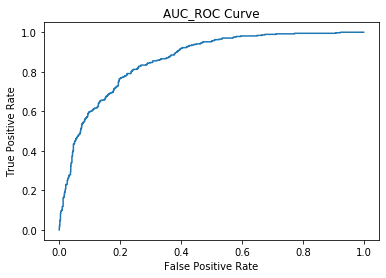

In [139]:
y_proba=logreg.predict_proba(X_test_final)[::,-1]
y_proba
fpr,tpr,thresholds=roc_curve(y_test,y_proba)
fpr,tpr,thresholds
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC_ROC Curve')


In [140]:
confusion_matrix(y_test,predictions)

array([[938,  98],
       [153, 220]], dtype=int64)

In [141]:
print('Precision Score:',precision_score(y_test,predictions))
print('Recall Score:',recall_score(y_test,predictions))
print('F1 Score:',f1_score(y_test,predictions))

Precision Score: 0.6918238993710691
Recall Score: 0.5898123324396782
F1 Score: 0.6367583212735166
